<a href="https://colab.research.google.com/github/KleaKalliri/Computer-Vision/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.Generate a synthetic image with random blobs

<Figure size 1000x1200 with 0 Axes>

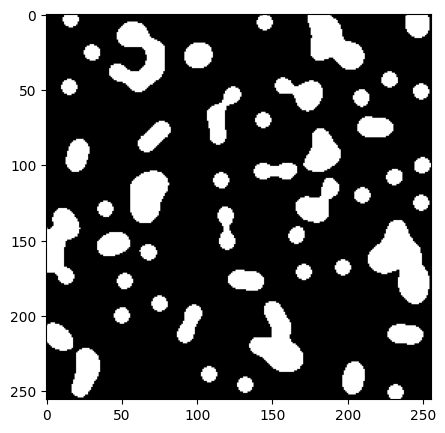

In [18]:
from skimage import data
import matplotlib.pyplot as plt

I = data.binary_blobs(length=256, volume_fraction=0.2, rng=2)
fig = plt.figure(figsize=(10,12))

fig = plt.figure(figsize=(5,5))
plt.imshow(I, cmap='gray')
plt.show()

2.Object segmentation and labeling

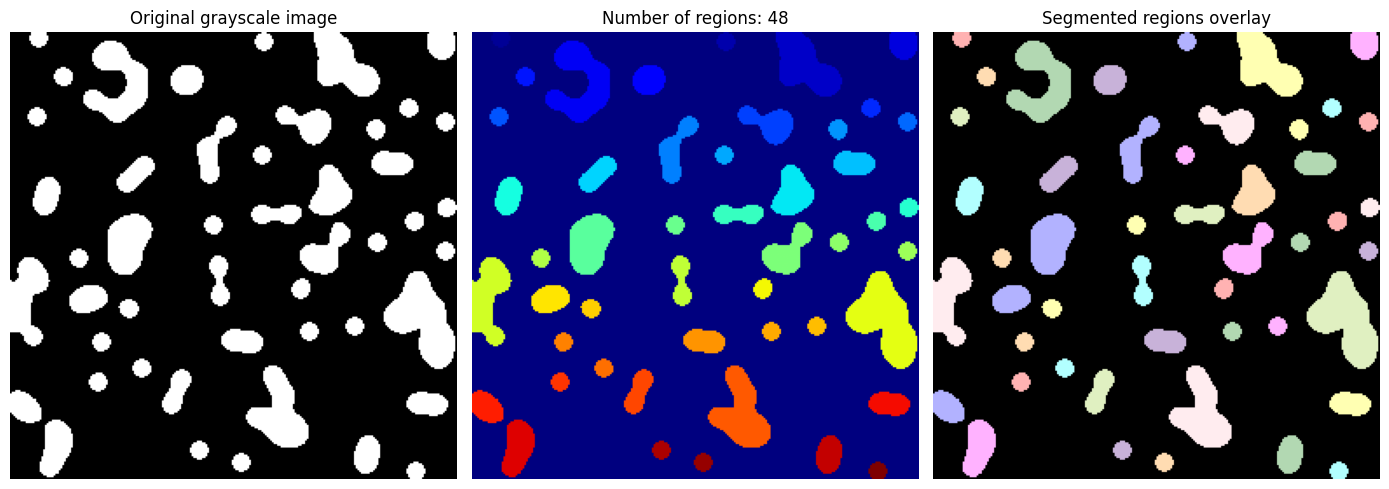

In [20]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb


# IG = I.squeeze()

thresh = threshold_otsu(IG)
bw = IG > thresh

label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions))
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

3.Get regional properties in a pandas dataframe

In [21]:
from skimage.measure import regionprops
import numpy as np

import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df = pd.DataFrame(props)
df.head()

,label,area,eccentricity,extent,axis_major_length
0,1,79.0,0.548338,0.797980,11.023565
1,2,89.0,0.000000,0.735537,10.642294
2,3,863.0,0.843002,0.613798,47.665095
3,4,224.0,0.301932,0.875000,17.442394
4,5,944.0,0.698946,0.542841,51.281433


<Axes: xlabel='axis_major_length', ylabel='area'>

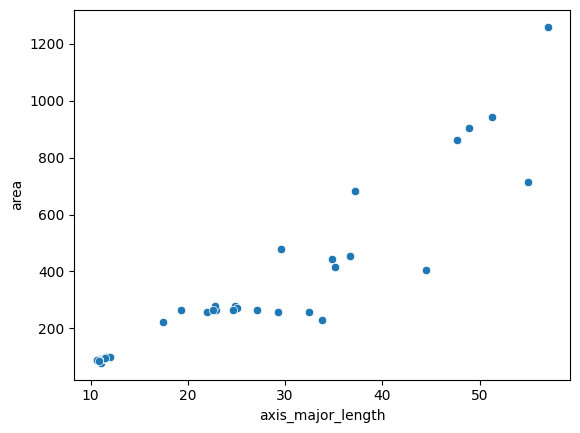

In [22]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df)

**Comment:** Clear correlation between blob's length and area can be observed

4.Analyze blobs

In [6]:
mean_area = df["area"].mean()
area_large = (df["area"] >= mean_area).sum()
print('There are {} blobs with an area larger or equal the mean area {}'.format(area_large, mean_area))

There are 21 blobs with an area larger or equal the mean area 113.0


In [7]:
mean_area = df["area"].mean()
area_large = (df["area"] < mean_area).sum()
print('There are {} blobs with an area smaller the mean area {}'.format(area_large, mean_area))

There are 37 blobs with an area smaller the mean area 113.0


In [23]:
large_blobs_labels = df.loc[df["area"] >= mean_area, "label"]
small_blobs_labels = df.loc[df["area"] < mean_area, "label"]

print("Labels of large blobs:", large_blobs_labels.tolist())
print("Labels of small blobs:", small_blobs_labels.tolist())

Labels of large blobs: [3, 4, 5, 6, 9, 12, 15, 16, 17, 18, 20, 22, 24, 28, 29, 30, 32, 36, 39, 40, 42, 43, 44, 45]
Labels of small blobs: [1, 2, 7, 8, 10, 11, 13, 14, 19, 21, 23, 25, 26, 27, 31, 33, 34, 35, 37, 38, 41, 46, 47, 48]


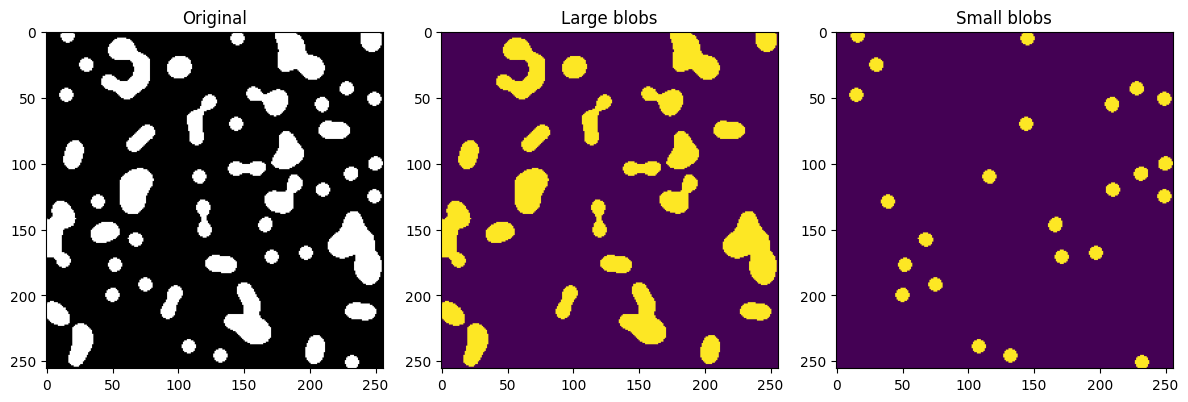

In [24]:
large_mask = np.isin(label_image, large_blobs_labels)
small_mask = np.isin(label_image, small_blobs_labels)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(large_mask)
ax[1].set_title('Large blobs')

ax[2].imshow(small_mask)
ax[2].set_title('Small blobs')

plt.tight_layout()
plt.show()

5.Obtain texture-based regional properties

In [27]:
from skimage.feature.texture import graycomatrix, graycoprops

g = graycomatrix(IG, [1], [0], levels=4, normed=False, symmetric=False)
print(I.astype(np.uint8))
print('Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,0,0,0]))
print('Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,1,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,2,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,0,0,0]))

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 51265
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 910
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 0
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import data, img_as_ubyte


props = regionprops(label_image,intensity_image=IG)

nregions = len(props)

props_texture = np.zeros((nregions,5))
for iregion, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = IG[minc:maxc,minr:maxr]
    Iu8 = img_as_ubyte(I)
    g = graycomatrix(Iu8, [1], [0], levels=256, normed=True, symmetric=True)
    contrast = graycoprops(g, 'contrast')
    dissimilarity = graycoprops(g, 'dissimilarity')
    homogeneity = graycoprops(g, 'homogeneity')
    energy = graycoprops(g, 'energy')
    correlation = graycoprops(g, 'correlation')

    props_texture[iregion,0] = contrast
    props_texture[iregion,1] = dissimilarity
    props_texture[iregion,2] = homogeneity
    props_texture[iregion,3] = energy
    props_texture[iregion,4] = correlation

    iregion = iregion + 1

df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df.to_excel("Texture_features.xlsx", index=False)
df

<ipython-input-29-617a92a06a5c>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,0] = contrast
<ipython-input-29-617a92a06a5c>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,1] = dissimilarity
<ipython-input-29-617a92a06a5c>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,2] = homogeneity
<ipython-input-29-617a92a06a5c>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,0.000000,0.000000,1.000000,1.000000,1.000000
1,2364.545455,9.272727,0.963637,0.894242,0.780000
2,998.190789,3.914474,0.984649,0.904565,0.907884
3,0.000000,0.000000,1.000000,1.000000,1.000000
4,993.331375,3.895417,0.984724,0.930645,0.871474
5,2780.674342,10.904605,0.957237,0.733674,0.898374
6,3546.818182,13.909091,0.945455,0.772781,0.844706
7,0.000000,0.000000,1.000000,1.000000,1.000000
8,3602.237216,14.126420,0.944603,0.740117,0.861470
9,6502.500000,25.500000,0.900002,0.647532,0.796211
